### IRIS FLOWERS CLASSIFICATION

### Importing Libraries

In [1]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

### Data Wrangling

In [2]:
# load the dataset.
iris = pd.read_csv("Iris.csv")

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 6)

###### Given Iris Dataset is having 150 rows/entries and 6 column

In [7]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Getting information about data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Preprocessing the dataset

In [9]:
# to display the number of null values for the corresponding columns.
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.isnull().values.any()

False

false means there are no null values present in a dataset.

In [11]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Statistical Insights

In [12]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Each Species has 50 counts, hence we can say given dataset is well balanced.

#### Data Cleaning

In [14]:
# droping id column
iris = iris.drop('Id', axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Now, Four columns (i.e. SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) are Numerical Type 

Column "Species" is categorical type.

In [15]:
# Checking duplicate Entries.

iris[iris.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


### Data Visualisation




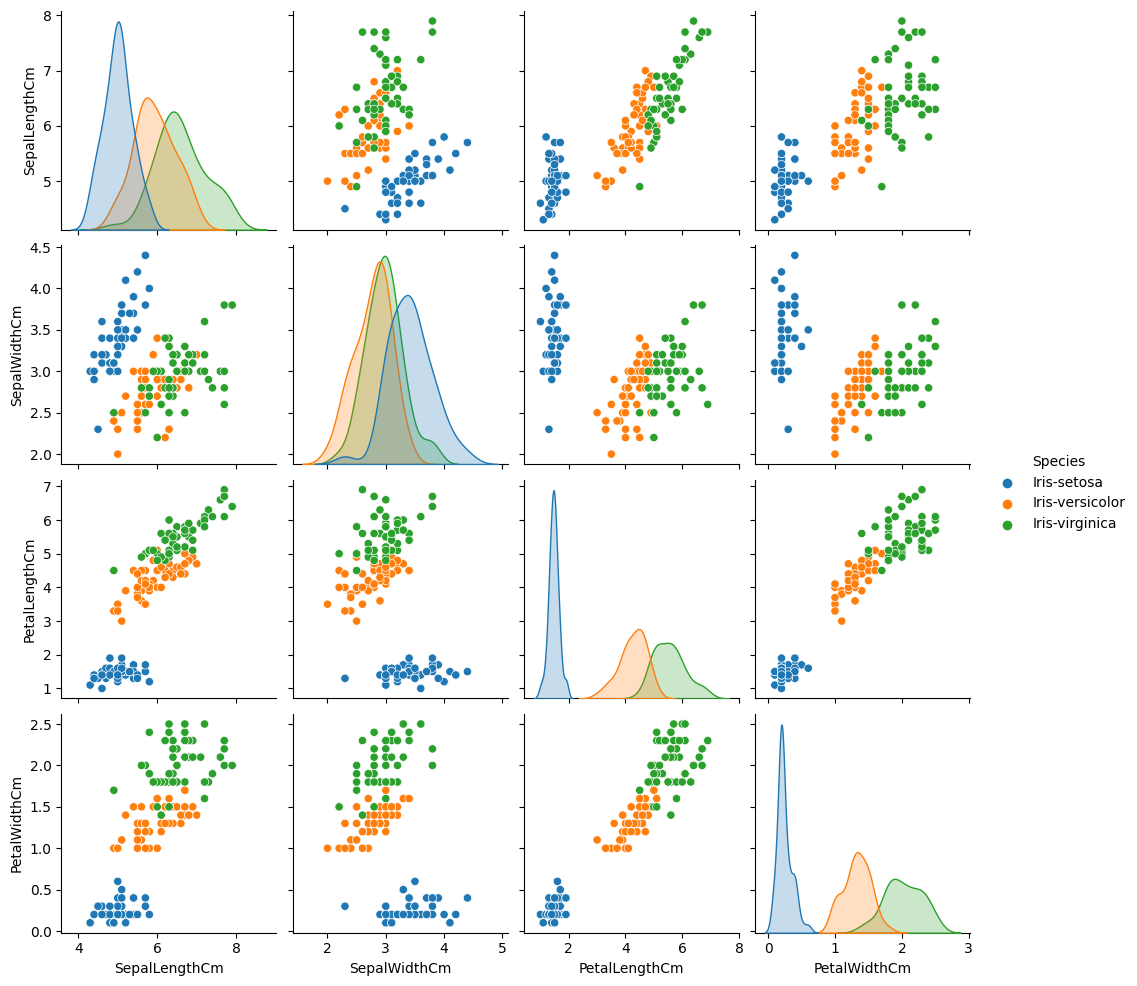

In [16]:
# to visualise the complete dataset.
sns.pairplot(iris, hue="Species")

Here, we can say that Iris-Setosa has the highest sepal length and petal width.

<AxesSubplot: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

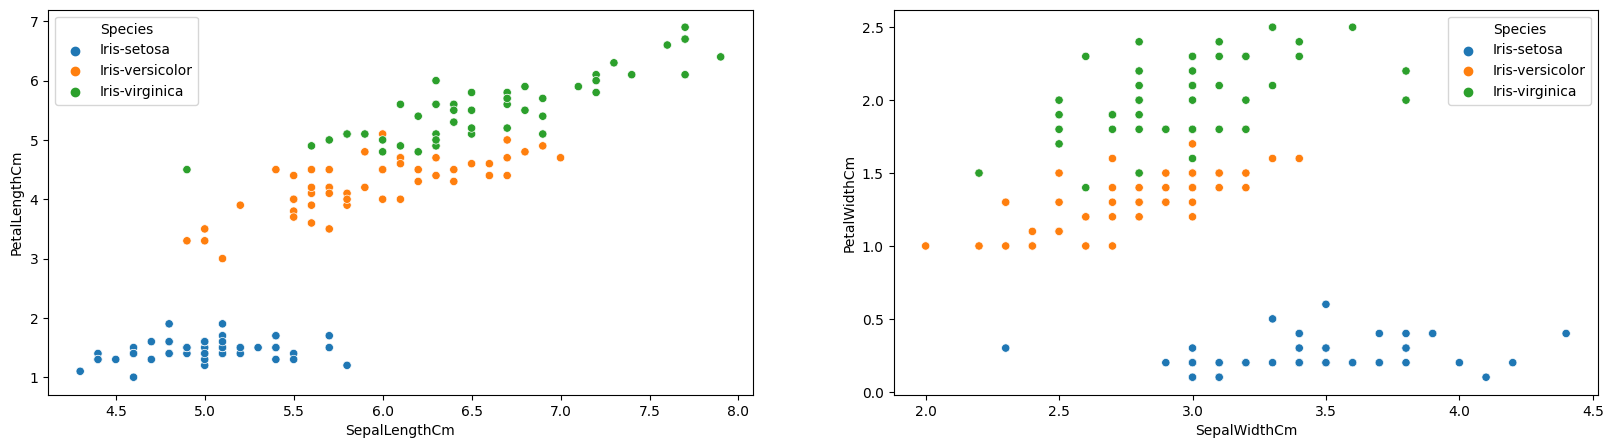

In [17]:
fig, (x1,x2) = plt.subplots(ncols=2, figsize=(20,5))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=iris, hue="Species", ax=x1)
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', data=iris, hue="Species", ax=x2)


From above visualisation, It is clear that Iris-Setosa is seperated from Iris-Versicolor and Iris-virginica

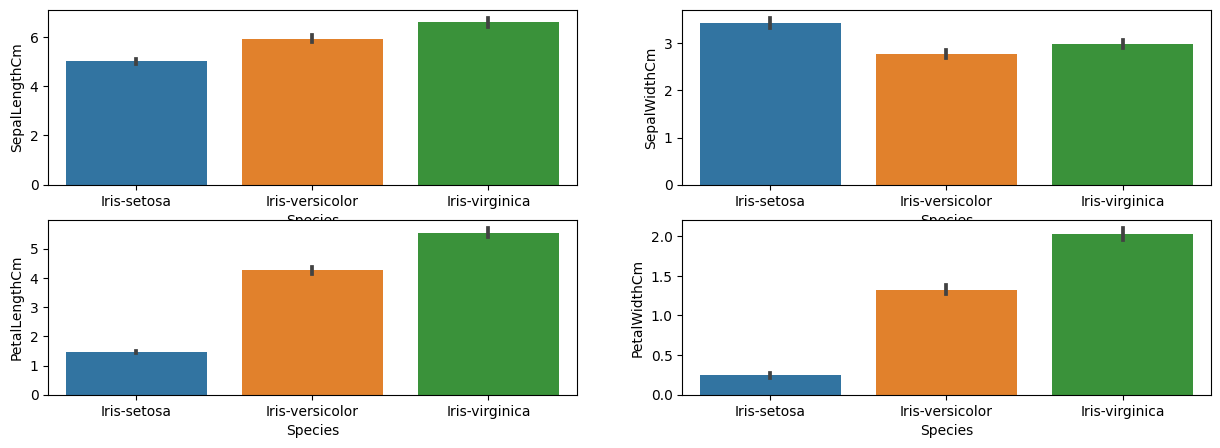

In [18]:
fig, axes = plt.subplots(2,2, figsize = (15,5))
sns.barplot(x="Species",y='SepalLengthCm',data=iris, ax=axes[0,0])

sns.barplot(x="Species",y='SepalWidthCm',data=iris, ax=axes[0,1])

sns.barplot(x="Species",y='PetalLengthCm',data=iris, ax=axes[1,0])

sns.barplot(x="Species",y='PetalWidthCm',data=iris, ax=axes[1,1])

plt.show()

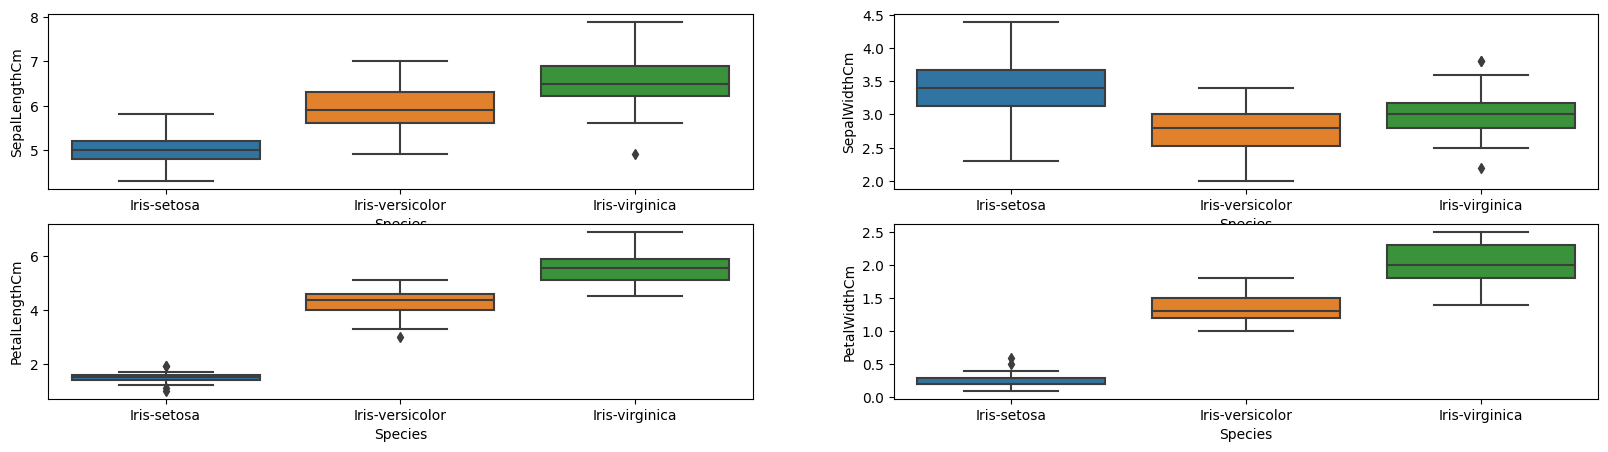

In [19]:
# boxplot to see distribution of each species with other 4 variables.
fig, axes = plt.subplots(2,2, figsize = (20,5))

sns.boxplot(data=iris, y="SepalLengthCm",x="Species",ax=axes[0,0])

sns.boxplot(data=iris, y="SepalWidthCm", x="Species",ax=axes[0,1])

sns.boxplot(data=iris, y="PetalLengthCm", x="Species",ax=axes[1,0])

sns.boxplot(data=iris, y="PetalWidthCm", x="Species",ax=axes[1,1])

plt.show()

here,It is clear that-

Iris-Setosa is less distributed and having smaller feature.

Iris-Versicolor is having average features and it is distibuted in an average.

Iris-virginca is highly distributed and having higher features.


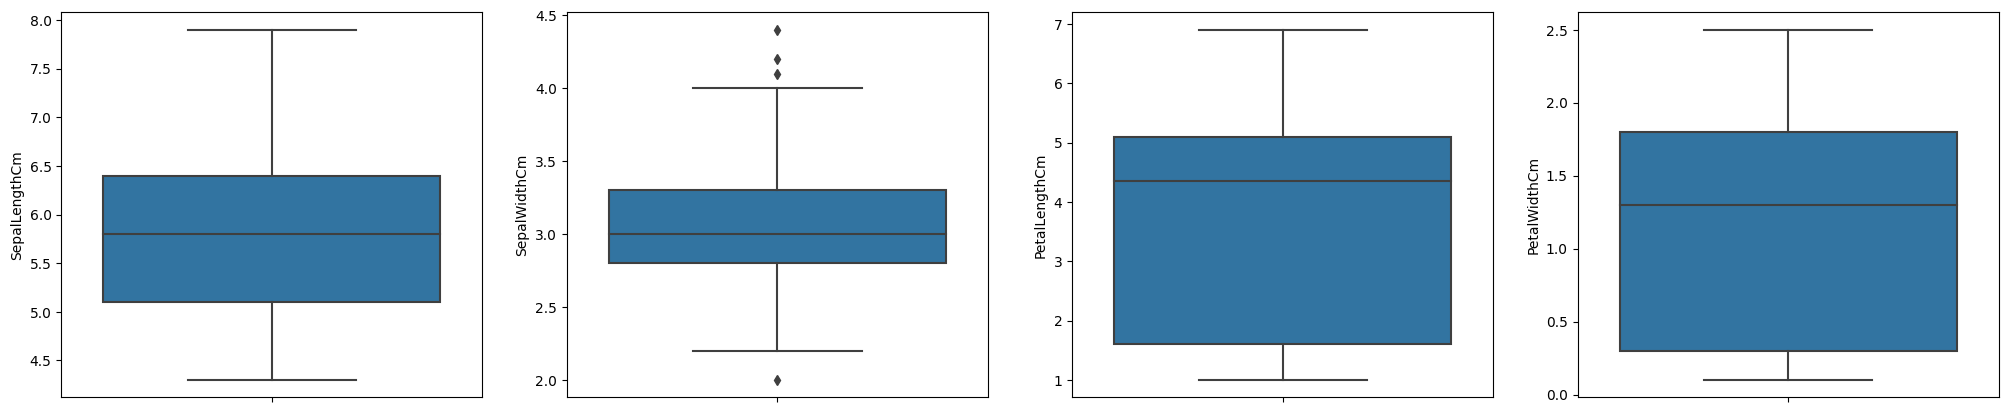

In [20]:
# boxplot to check the outliers.
fig, axes = plt.subplots(1,4, figsize = (25,5))
plt.subplot(1,4,1)
sns.boxplot(data=iris, y="SepalLengthCm") 

plt.subplot(1,4,2)
sns.boxplot(data=iris, y="SepalWidthCm")

plt.subplot(1,4,3)
sns.boxplot(data=iris, y="PetalLengthCm")

plt.subplot(1,4,4)
sns.boxplot(data=iris, y="PetalWidthCm")

plt.show()

from above visualisation it is clear that sepal width has some outliers.

### Correlation matrix

In [21]:
iris.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11100\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_11100\1638733960.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='viridis')


<AxesSubplot: >

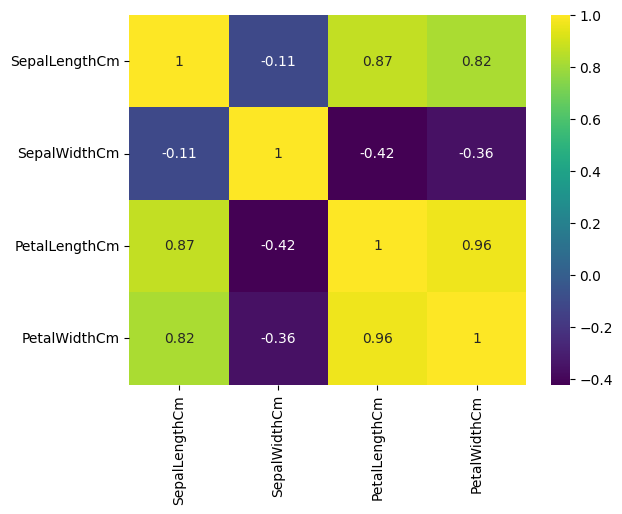

In [22]:
sns.heatmap(iris.corr(), annot=True, cmap='viridis')

From above visualisation, It is clear that Petal length and Petal width are highly correlated.

### Label Encoder 

To convert categorical data into numerical data, so as to convert it into the machine readable form.

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
iris['Species'] = le.fit_transform(iris['Species'])
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Model Training

In [25]:
x=iris.drop('Species',axis=1)

In [26]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y = iris['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

#### train-test split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

### Support Vector Machine

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [30]:
print("Accuracy:",svc.score(x_test,y_test)*100)

Accuracy: 96.66666666666667


### Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
# model training
lr.fit(x_train, y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# getting performance of the model.
print("Accuracy of the logistic regression model is",lr.score(x_test,y_test)*100)

Accuracy of the logistic regression model is 96.66666666666667


### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
print("Accuracy of the Decision Tree Classifier  model is",dtc.score(x_test, y_test)*100)

Accuracy of the Decision Tree Classifier  model is 96.66666666666667


### KNN K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
print("Accuracy of the K-Nearest Neighbors model is",knn.score(x_test, y_test)*100)

Accuracy of the K-Nearest Neighbors model is 96.66666666666667


### Thank you!